# CaseStudy - Week 6 Day 2 - HyperParameter Tuning 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [2]:
data=pd.read_csv("nasa.csv")
df=data.copy()
df.head(10)

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
5,3671135,3671135,19.6,0.319562,0.714562,319.561887,714.562102,0.198566,0.444008,1048.431420,2344.363926,1995-01-15,790156800000,10.808844,38911.838251,24178.303051,0.392785,152.793274,58759768.0,36511628.0,Earth,40,2017-06-04 06:16:52,1,0.272213,4.724,2458000.5,0.563441,1.323532,17.927751,178.971951,556.160556,0.577800,198.145969,2.069265,2.458009e+06,354.237368,0.647295,J2000,False
6,2495323,2495323,19.6,0.319562,0.714562,319.561887,714.562102,0.198566,0.444008,1048.431420,2344.363926,1995-01-15,790156800000,10.808842,38911.829716,24178.297748,0.392783,152.792664,58759532.0,36511480.0,Earth,43,2017-06-28 06:19:25,1,0.272213,4.724,2458000.5,0.563441,1.323532,17.927748,178.971953,556.160544,0.577800,198.145960,2.069265,2.458009e+06,354.237396,0.647295,J2000,False
7,2153315,2153315,19.2,0.384198,0.859093,384.197891,859.092601,0.238729,0.533815,1260.491809,2818.545370,1995-01-22,790761600000,24.421884,87918.782382,54629.312308,0.129179,50.250694,19324928.0,12007954.0,Earth,22,2017-04-06 09:27:05,0,0.098758,4.921,2458000.5,0.449763,1.237475,34.695127,112.562984,502.808758,0.680905,288.374651,1.794045,2.458242e+06,186.776932,0.715978,J2000,False
8,2162463,2162463,17.8,0.732074,1.636967,732.073989,1636.967205,0.454890,1.017164,2401.817627,5370.627484,1995-01-22,790761600000,17.373784,62545.621813,38863.417065,0.358283,139.372055,53598364.0,33304478.0,Ea

<AxesSubplot:>

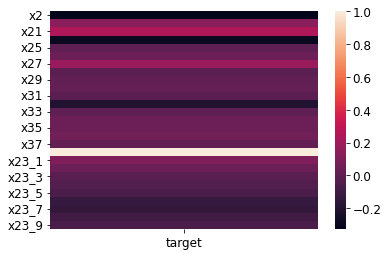

In [29]:
sns.heatmap(df.corr()[["target"]])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Neo Reference ID,4687.0,3.272298e+06,5.486011e+05,2.000433e+06,3.097594e+06,3.514799e+06,3.690060e+06,3.781897e+06
Name,4687.0,3.272298e+06,5.486011e+05,2.000433e+06,3.097594e+06,3.514799e+06,3.690060e+06,3.781897e+06
Absolute Magnitude,4687.0,2.226786e+01,2.890972e+00,1.116000e+01,2.010000e+01,2.190000e+01,2.450000e+01,3.210000e+01
Est Dia in KM(min),4687.0,2.046042e-01,3.695734e-01,1.010543e-03,3.346224e-02,1.108039e-01,2.538370e-01,1.557955e+01
Est Dia in KM(max),4687.0,4.575089e-01,8.263912e-01,2.259644e-03,7.482384e-02,2.477650e-01,5.675969e-01,3.483694e+01
Est Dia in M(min),4687.0,2.046042e+02,3.695734e+02,1.010543e+00,3.346224e+01,1.108039e+02,2.538370e+02,1.557955e+04
Est Dia in M(max),4687.0,4.575089e+02,8.263912e+02,2.259644e+00,7.482384e+01,2.477650e+02,5.675969e+02,3.483694e+04
Est Dia in Miles(min),4687.0,1.271351e-01,2.296422e-01,6.279224e-04,2.079246e-02,6.885032e-02,1.577270e-01,9.680682e+00
Est Dia in Miles(max),4687.0,2.842828e-01,5.134956e-01,1.404077e-03,4.649336e-02,1.539540e-01,3.526882e-01,2.164666e+01
Est Dia in Feet(min),4687.0,6.712737e+02,1.212511e+03,3.315431e+00,1.097842e+02,3.635298e+02,8.327987e+02,5.111402e+04


<AxesSubplot:>

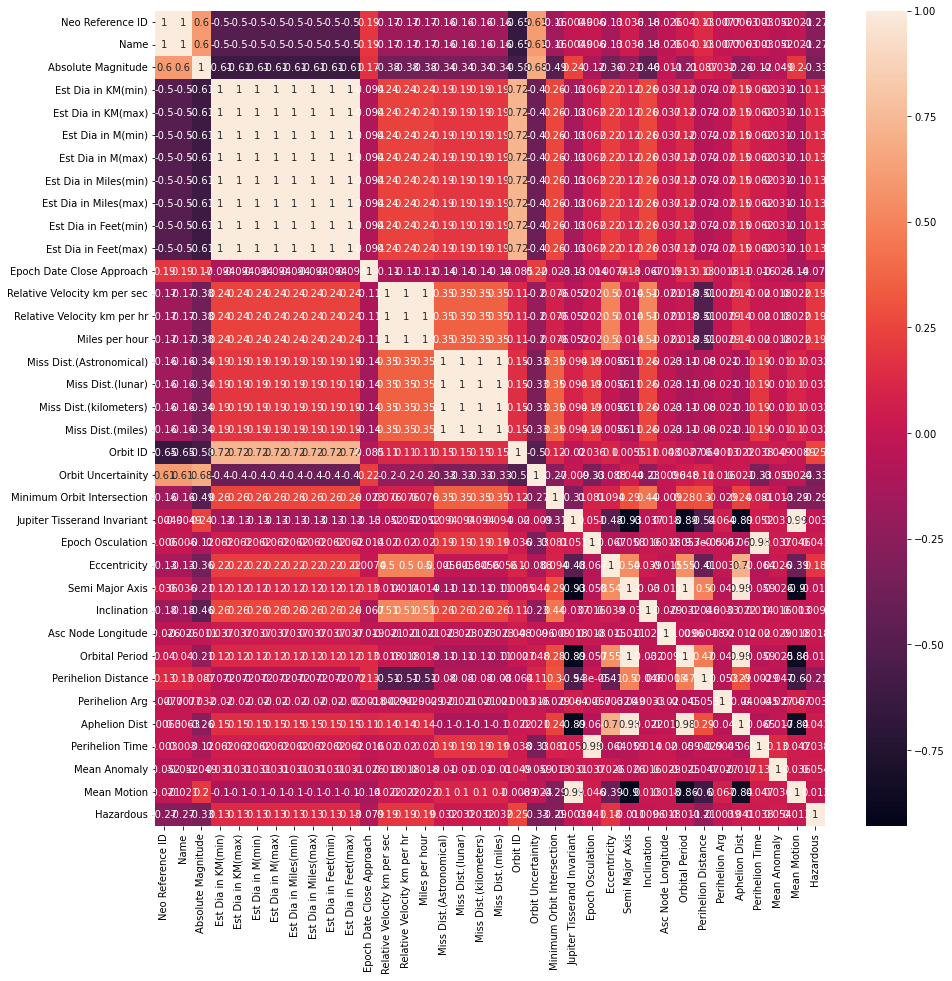

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [8]:
columns_size=df.shape[1]
newNames=[]
for i in range(columns_size-1):
    newNames.append("x"+str(i))
newNames.append("target")

In [9]:
df.columns=newNames

In [10]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,target
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


<AxesSubplot:>

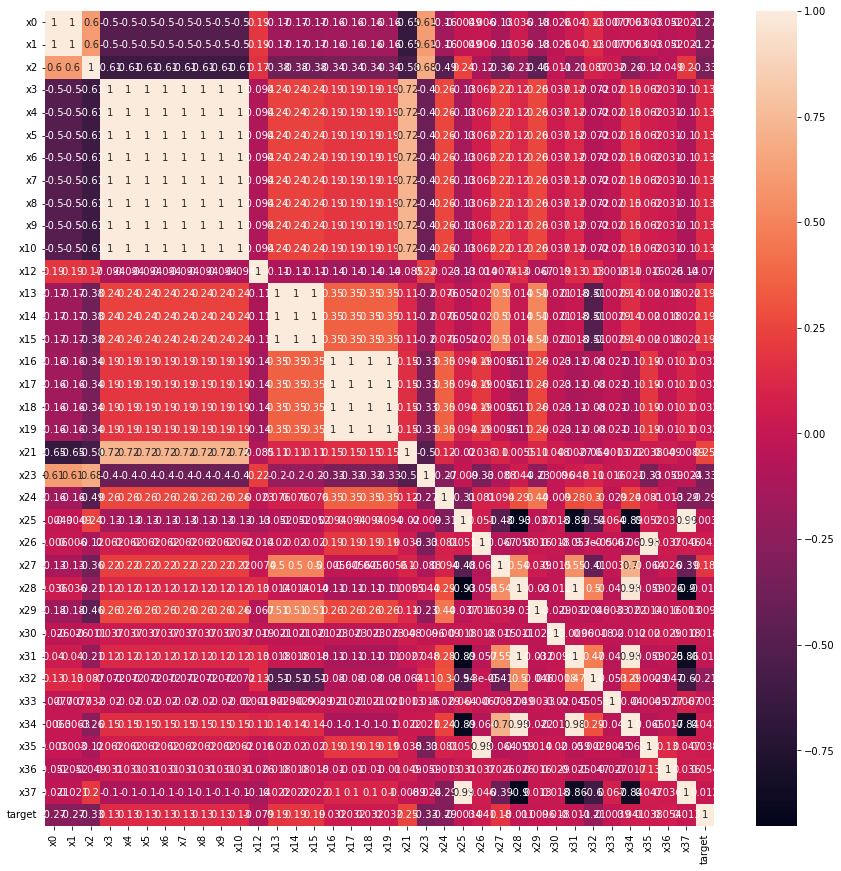

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

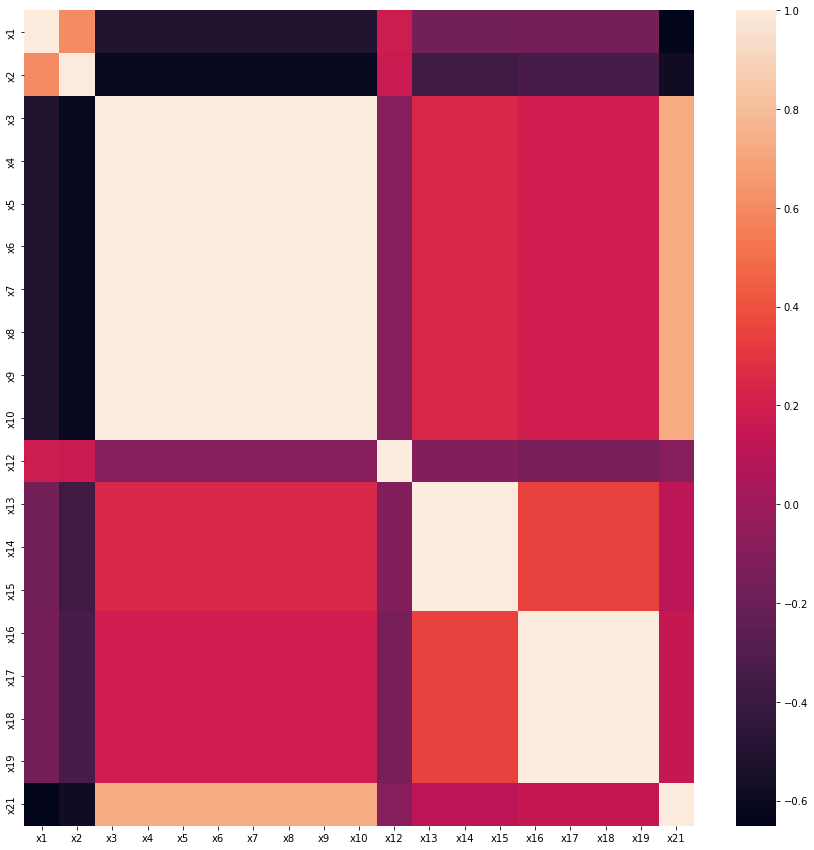

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(df.loc[::,"x1":"x21"].corr())

__x4-x10__ deleting
__x14-x18__

In [13]:
deletedColumns=[]
for i in range(4,11):
    deletedColumns.append("x"+str(i))
for i in range(14,19):
    deletedColumns.append("x"+str(i))
deletedColumns.append("x0")
deletedColumns.append("x1")

In [14]:
deletedColumns

['x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x0',
 'x1']

<AxesSubplot:>

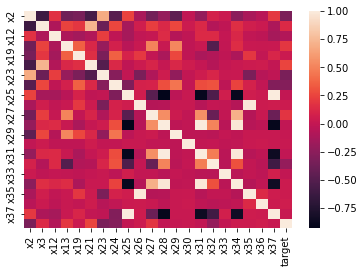

In [15]:
df.drop(deletedColumns,axis=1,inplace=True)
sns.heatmap(df.corr())

In [17]:
df.shape

(4687, 26)

In [16]:
for col in df.columns:
    print(col,":",df[col].value_counts().count())

x2 : 269
x3 : 269
x11 : 777
x12 : 777
x13 : 4687
x19 : 4660
x20 : 1
x21 : 188
x22 : 2680
x23 : 10
x24 : 3678
x25 : 2495
x26 : 429
x27 : 3692
x28 : 3692
x29 : 3692
x30 : 3692
x31 : 3692
x32 : 3692
x33 : 3692
x34 : 3692
x35 : 3692
x36 : 3692
x37 : 3692
x38 : 1
target : 2


In [15]:
df["x11"].value_counts() # for deleting 

2016-07-22    18
2015-01-15    17
2015-02-15    16
2012-03-15    16
2014-11-22    16
              ..
2000-05-08    1 
1999-05-15    1 
1998-09-15    1 
1999-04-22    1 
2001-06-22    1 
Name: x11, Length: 777, dtype: int64

In [16]:
df["x12"].value_counts() # for Deleting 

1469170800000    18
1421308800000    17
1423987200000    16
1331794800000    16
1416643200000    16
                 ..
957769200000     1 
926751600000     1 
905842800000     1 
924764400000     1 
993193200000     1 
Name: x12, Length: 777, dtype: int64

In [17]:
df["x23"].value_counts() # categorical 

0    1353
7    700 
6    620 
1    568 
8    329 
5    321 
2    279 
4    212 
3    182 
9    123 
Name: x23, dtype: int64

In [18]:
df["x2"].value_counts() # categorical 

21.200    84
20.800    84
21.000    76
21.600    73
20.300    71
          ..
19.845    1 
25.102    1 
21.457    1 
20.616    1 
19.109    1 
Name: x2, Length: 269, dtype: int64

In [19]:
df["x3"].value_counts()

0.152952    84
0.183889    84
0.167708    76
0.127220    73
0.231502    71
            ..
0.285466    1 
0.025360    1 
0.135880    1 
0.200150    1 
0.400641    1 
Name: x3, Length: 269, dtype: int64

In [20]:
df["x22"].value_counts()

2017-06-21 06:17:20    9
2017-04-06 09:24:24    8
2017-04-06 08:57:13    8
2017-05-03 06:18:20    7
2017-04-06 08:26:19    7
                      ..
2017-04-06 09:22:43    1
2017-04-06 09:09:56    1
2017-04-06 09:10:02    1
2017-04-06 08:22:38    1
2017-04-29 06:18:33    1
Name: x22, Length: 2680, dtype: int64

In [18]:
# Deleting columns x11,x12,x13,x19,x20,x38

In [19]:
df.drop(["x11","x12","x13","x19","x20","x38","x22"],axis=1,inplace=True)

In [20]:
df[["x23"]]=df[["x23"]].astype(object)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x2      4687 non-null   float64
 1   x3      4687 non-null   float64
 2   x21     4687 non-null   int64  
 3   x23     4687 non-null   object 
 4   x24     4687 non-null   float64
 5   x25     4687 non-null   float64
 6   x26     4687 non-null   float64
 7   x27     4687 non-null   float64
 8   x28     4687 non-null   float64
 9   x29     4687 non-null   float64
 10  x30     4687 non-null   float64
 11  x31     4687 non-null   float64
 12  x32     4687 non-null   float64
 13  x33     4687 non-null   float64
 14  x34     4687 non-null   float64
 15  x35     4687 non-null   float64
 16  x36     4687 non-null   float64
 17  x37     4687 non-null   float64
 18  target  4687 non-null   bool   
dtypes: bool(1), float64(16), int64(1), object(1)
memory usage: 663.8+ KB


Text(0.5, 1.0, "Correlations of the numerical variables to 'Hazardous' feature")

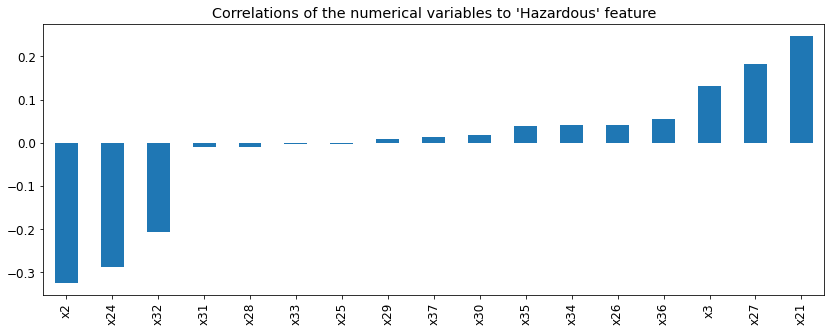

In [22]:
plt.figure(figsize=(14,5))
plt.rcParams['font.size']=12
df.corr()['target'].sort_values().drop('target').plot(kind='bar')
plt.title("Correlations of the numerical variables to 'Hazardous' feature")

### One Hot Encoding  

In [23]:
dms_df=df.select_dtypes(include=['object'])
dms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x23     4687 non-null   object
dtypes: object(1)
memory usage: 36.7+ KB


In [24]:

dms_df=pd.get_dummies(dms_df,drop_first=True)
df_=df.drop(df.select_dtypes(include=['object']).columns,axis=1)

df=pd.concat([df_,dms_df],axis=1)

False    3932
True     755 
Name: target, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x2      4687 non-null   float64
 1   x3      4687 non-null   float64
 2   x21     4687 non-null   int64  
 3   x24     4687 non-null   float64
 4   x25     4687 non-null   float64
 5   x26     4687 non-null   float64
 6   x27     4687 non-null   float64
 7   x28     4687 non-null   float64
 8   x29     4687 non-null   float64
 9   x30     4687 non-null   float64
 10  x31     4687 non-null   float64
 11  x32     4687 non-null   float64
 12  x33     4687 non-null   float64
 13  x34     4687 non-null   float64
 14  x35     4687 non-null   float64
 15  x36     4687 non-null   float64
 16  x37     4687 non-null   float64
 17  target  4687 non-null   bool   
 18  x23_1   4687 non-null   uint8  
 19  x23_2   4687 non-null   uint8  
 20  x23_3   4687 non-null   uint8  
 21  x23_4   4687 non-null   uint8  
 22  

### Train Test Split 

##### Balanced DataFrame

In [29]:
from sklearn.model_selection import train_test_split
y=df.target
X=df.drop("target",axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.23,random_state=42)

### Scaling 

In [30]:
from sklearn.preprocessing import RobustScaler
rc=RobustScaler().fit(X_train)
X_train_scaled=rc.transform(X_train)
X_test_scaled=rc.transform(X_test)

### XGBoost Classifier

In [33]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=42)
model.fit(X_train_scaled, y_train,eval_metric=['auc'],verbose=True)
model.score(X_test_scaled,y_test)

0.995366079703429

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
cm=confusion_matrix(y_test,model.predict(X_test_scaled))
print("Confusion Matrix\n\n",cm)

accuracy = accuracy_score(y_test, model.predict(X_test_scaled)) 
precision = precision_score(y_test, model.predict(X_test_scaled)) 
recall = recall_score(y_test, model.predict(X_test_scaled)) 
f1 = f1_score(y_test, model.predict(X_test_scaled))

print("\nAccuracy score:",accuracy,
      "\nPrecision score:",precision,
      "\nRecall score:",recall,
      "\nF1 score:",f1)

Confusion Matrix

 [[909   3]
 [  2 165]]

Accuracy score: 0.995366079703429 
Precision score: 0.9821428571428571 
Recall score: 0.9880239520958084 
F1 score: 0.9850746268656716


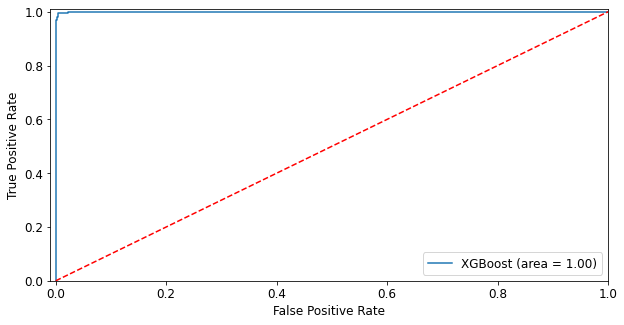

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

result = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1])
fpr, tpr, thresholds = roc_curve(y_test,model.predict_proba(X_test_scaled)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % result)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

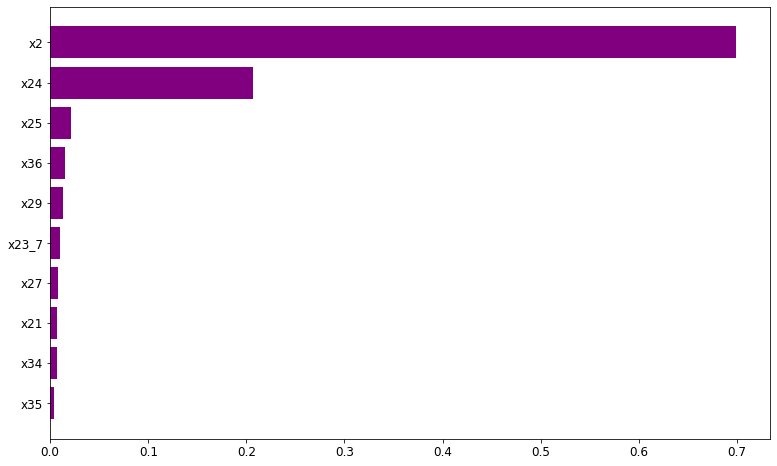

In [36]:
Importance=pd.DataFrame({
    "Features":model.feature_importances_
},index=X_train.columns)
data=Importance.sort_values(by="Features",axis=0,ascending=True)
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])

ax.barh(data.index[-10:],data.Features[-10:],color="purple")
plt.show()


### Optimization - Randomized

In [37]:
# Import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [38]:
xg_model2=xgb.XGBClassifier(random_state=42)

xg_params={
    'max_depth':[5,6,7,8],
    "gamma":[0.01,0.5,0.1,0.8],
    'colsample_bytree': [0.4,0.6],
    'learning_rate':[0.001,0.01,0.1,0.5],
    'subsample':[0.6,0.7,0.8],
    'n_estimators': [300,500,800,1200,1500]
}


xg_cv_model=RandomizedSearchCV(estimator=xg_model2, 
                        param_distributions=xg_params,
                        scoring='accuracy',
                        cv=5,
                        n_iter=10,
                        return_train_score=True,
                        random_state=42)

xg_cv_model.fit(X_train_scaled, y_train,eval_metric=['auc'],verbose=True)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           num_parallel_tree=None,
                                           predictor=None, random_state

In [41]:
xg_cv_model.best_params_

{'subsample': 0.6,
 'n_estimators': 500,
 'max_depth': 6,
 'learning_rate': 0.5,
 'gamma': 0.1,
 'colsample_bytree': 0.6}

### Final Model with RandomizedSearch

In [42]:
xg_tuned=xgb.XGBClassifier(max_depth=6,
                       learning_rate=0.5,
                       subsample=0.6,
                       gamma=0.1,
                       n_estimators=500,
                       colsample_bytree=0.6,
                       random_state=42).fit(X_train_scaled, y_train,eval_metric=['auc'],verbose=True)

y_pred_tuned=xg_tuned.predict(X_test_scaled)
accuracy_score(y_test,y_pred_tuned)

0.995366079703429

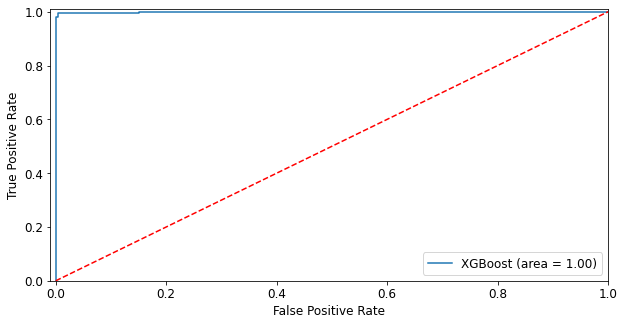

In [43]:
result = roc_auc_score(y_test, xg_tuned.predict_proba(X_test_scaled)[:,1])
fpr, tpr, thresholds = roc_curve(y_test,xg_tuned.predict_proba(X_test_scaled)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % result)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

### Optimization - Bayesian

In [60]:
from skopt import BayesSearchCV
# parameter ranges are specified by one of below
from skopt.space import Real, Categorical, Integer

xg_model3=xgb.XGBClassifier(random_state=42)

xg_params={
    'max_depth':Integer(1,10),
    'learning_rate':Real(0.01,0.5, prior='log-uniform'),
    'subsample':[0.6,0.7,0.8],
    'n_estimators': Integer(300,1500)
}


# log-uniform: understand as search over p = exp(x) by varying x
opt = BayesSearchCV(
    xg_model3,
    xg_params,
    n_iter=15,
    random_state=0
)

# executes bayesian optimization
_ = opt.fit(X_train, y_train)

# model can be saved, used for predictions or scoring
print(opt.score(X_test, y_test))

0.9962928637627433


### Final Model

In [61]:
opt.get_params

<bound method BaseEstimator.get_params of BayesSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, gamma=None, gpu_id=None,
                                      grow_policy=None, importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None, max_bin=None,
                                      max_cat_to...
                                      random_state=42, reg_alpha=None,
                                      reg_lambda=None, ...),
              n_iter=15, random_state=0,
              search_spaces={'learn

In [68]:
opt.best_estimator_.subsample

0.4864791595878673

In [69]:
xg_tuned=xgb.XGBClassifier(
  learning_rate=0.4864791595878673,
  max_depth=1,
  n_estimators=1350,
  subsample=0.8,
  seed=42).fit(X_train_scaled,y_train,verbose=True)

y_pred_tuned=xg_tuned.predict(X_test_scaled)
accuracy_score(y_test,y_pred_tuned)

0.9962928637627433

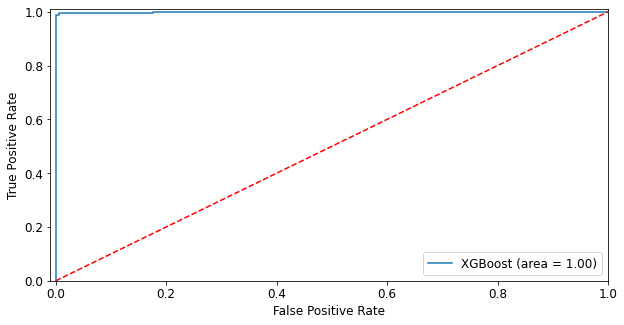

In [70]:
result = roc_auc_score(y_test, xg_tuned.predict_proba(X_test_scaled)[:,1])
fpr, tpr, thresholds = roc_curve(y_test,xg_tuned.predict_proba(X_test_scaled)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % result)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()